In [12]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source
import os

In [13]:
nodos = []
hijos = []

In [14]:
def generar_hanoi_arbol(n, origen, destino, auxiliar, padre=None):
    if n == 1:
        nombre = f"Mover de {origen} a {destino}"
        nodos.append(nombre)
        hijos.append(padre)
    else:
        nombre1 = f"({n-1}) {origen}->{auxiliar}"
        nombre2 = f"Mover de {origen} a {destino}"
        nombre3 = f"({n-1}) {auxiliar}->{destino}"

        nodos.append(nombre1)
        hijos.append(padre)

        nodos.append(nombre2)
        hijos.append(nombre1)

        nodos.append(nombre3)
        hijos.append(nombre2)

        generar_hanoi_arbol(n-1, origen, auxiliar, destino, padre=nombre1)
        generar_hanoi_arbol(n-1, auxiliar, destino, origen, padre=nombre3)

# Generar el árbol de decisiones para 3 discos
generar_hanoi_arbol(3, 'A', 'B', 'C')

In [15]:
X = [[i] for i in range(len(nodos))]
y = nodos

In [16]:
modelo_dtr = DecisionTreeClassifier(random_state=0)

In [17]:
modelo_dtr.fit(X, y)

DecisionTreeClassifier(random_state=0)

In [18]:
export_graphviz(
    modelo_dtr,
    out_file="hanoi_tree.dot",
    feature_names=["Pasos"],
    class_names=y,
    rounded=True,
    filled=True
)

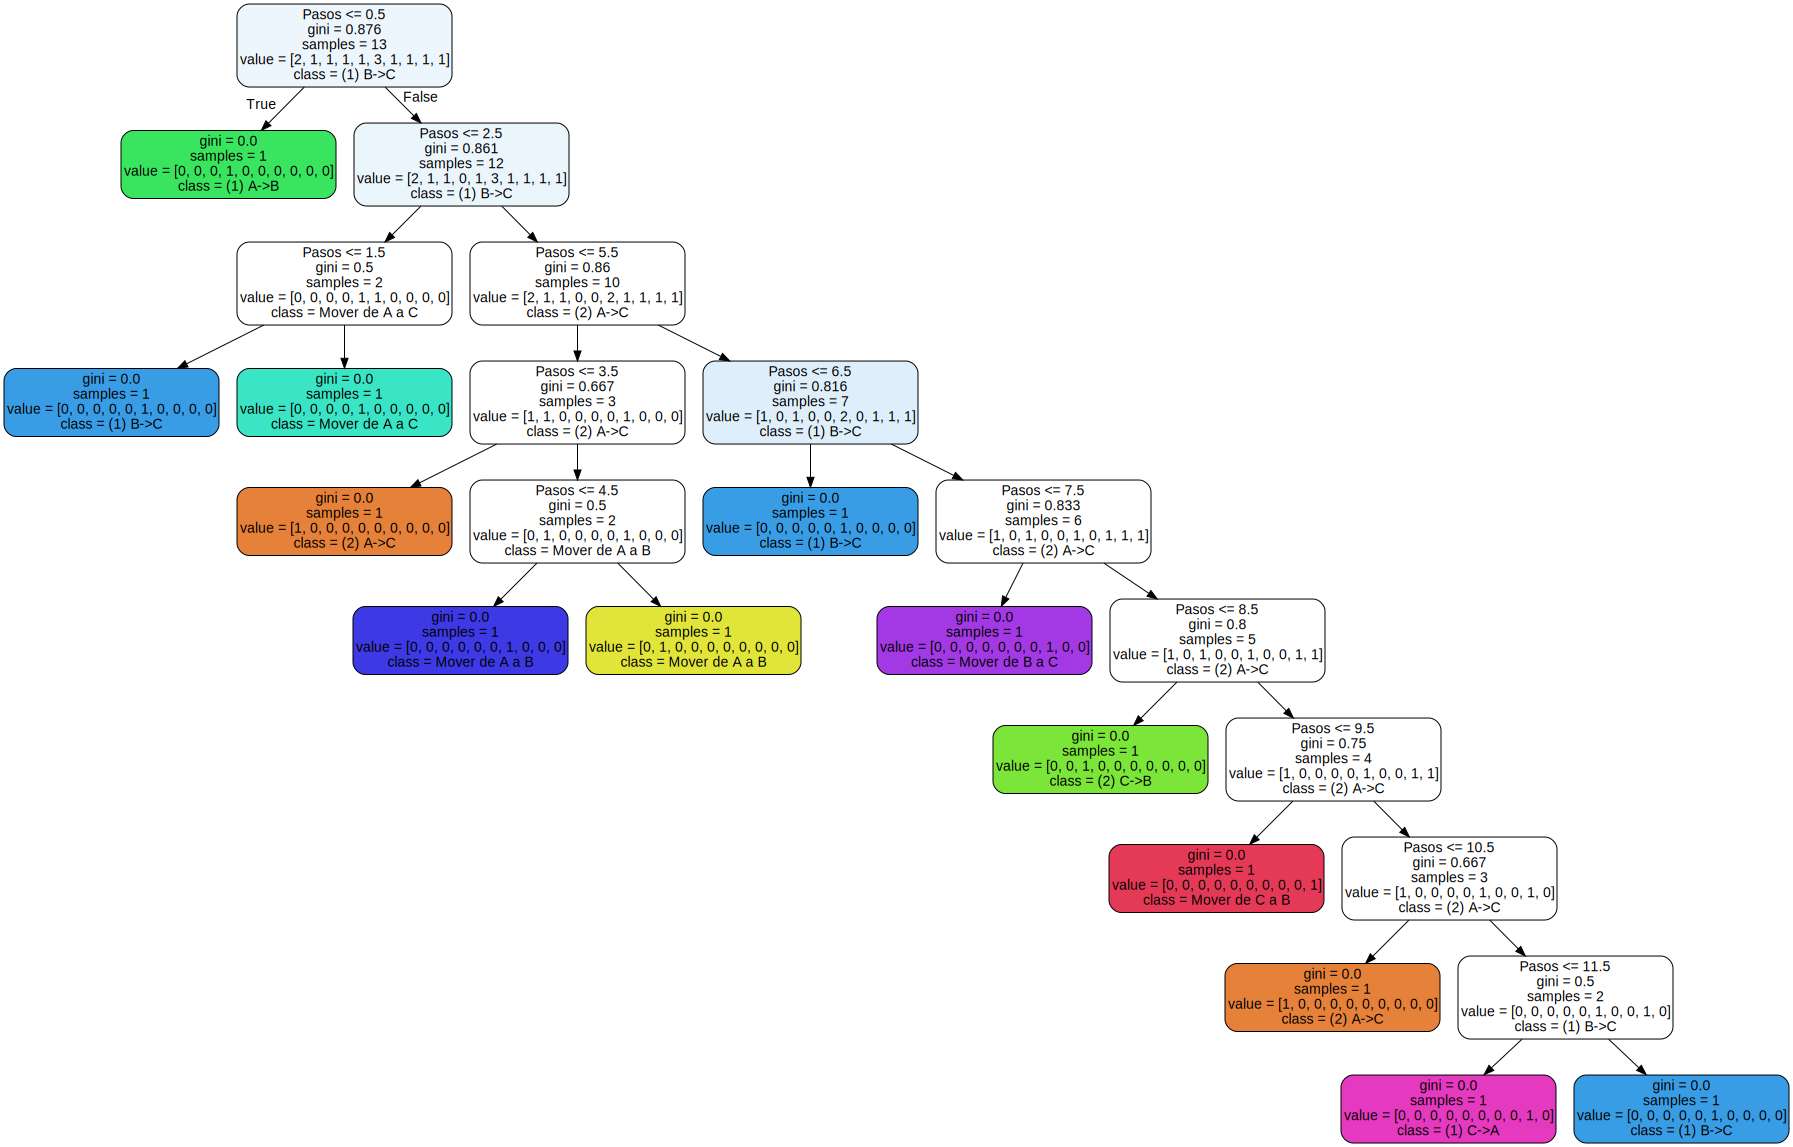

In [19]:
Source.from_file("hanoi_tree.dot")

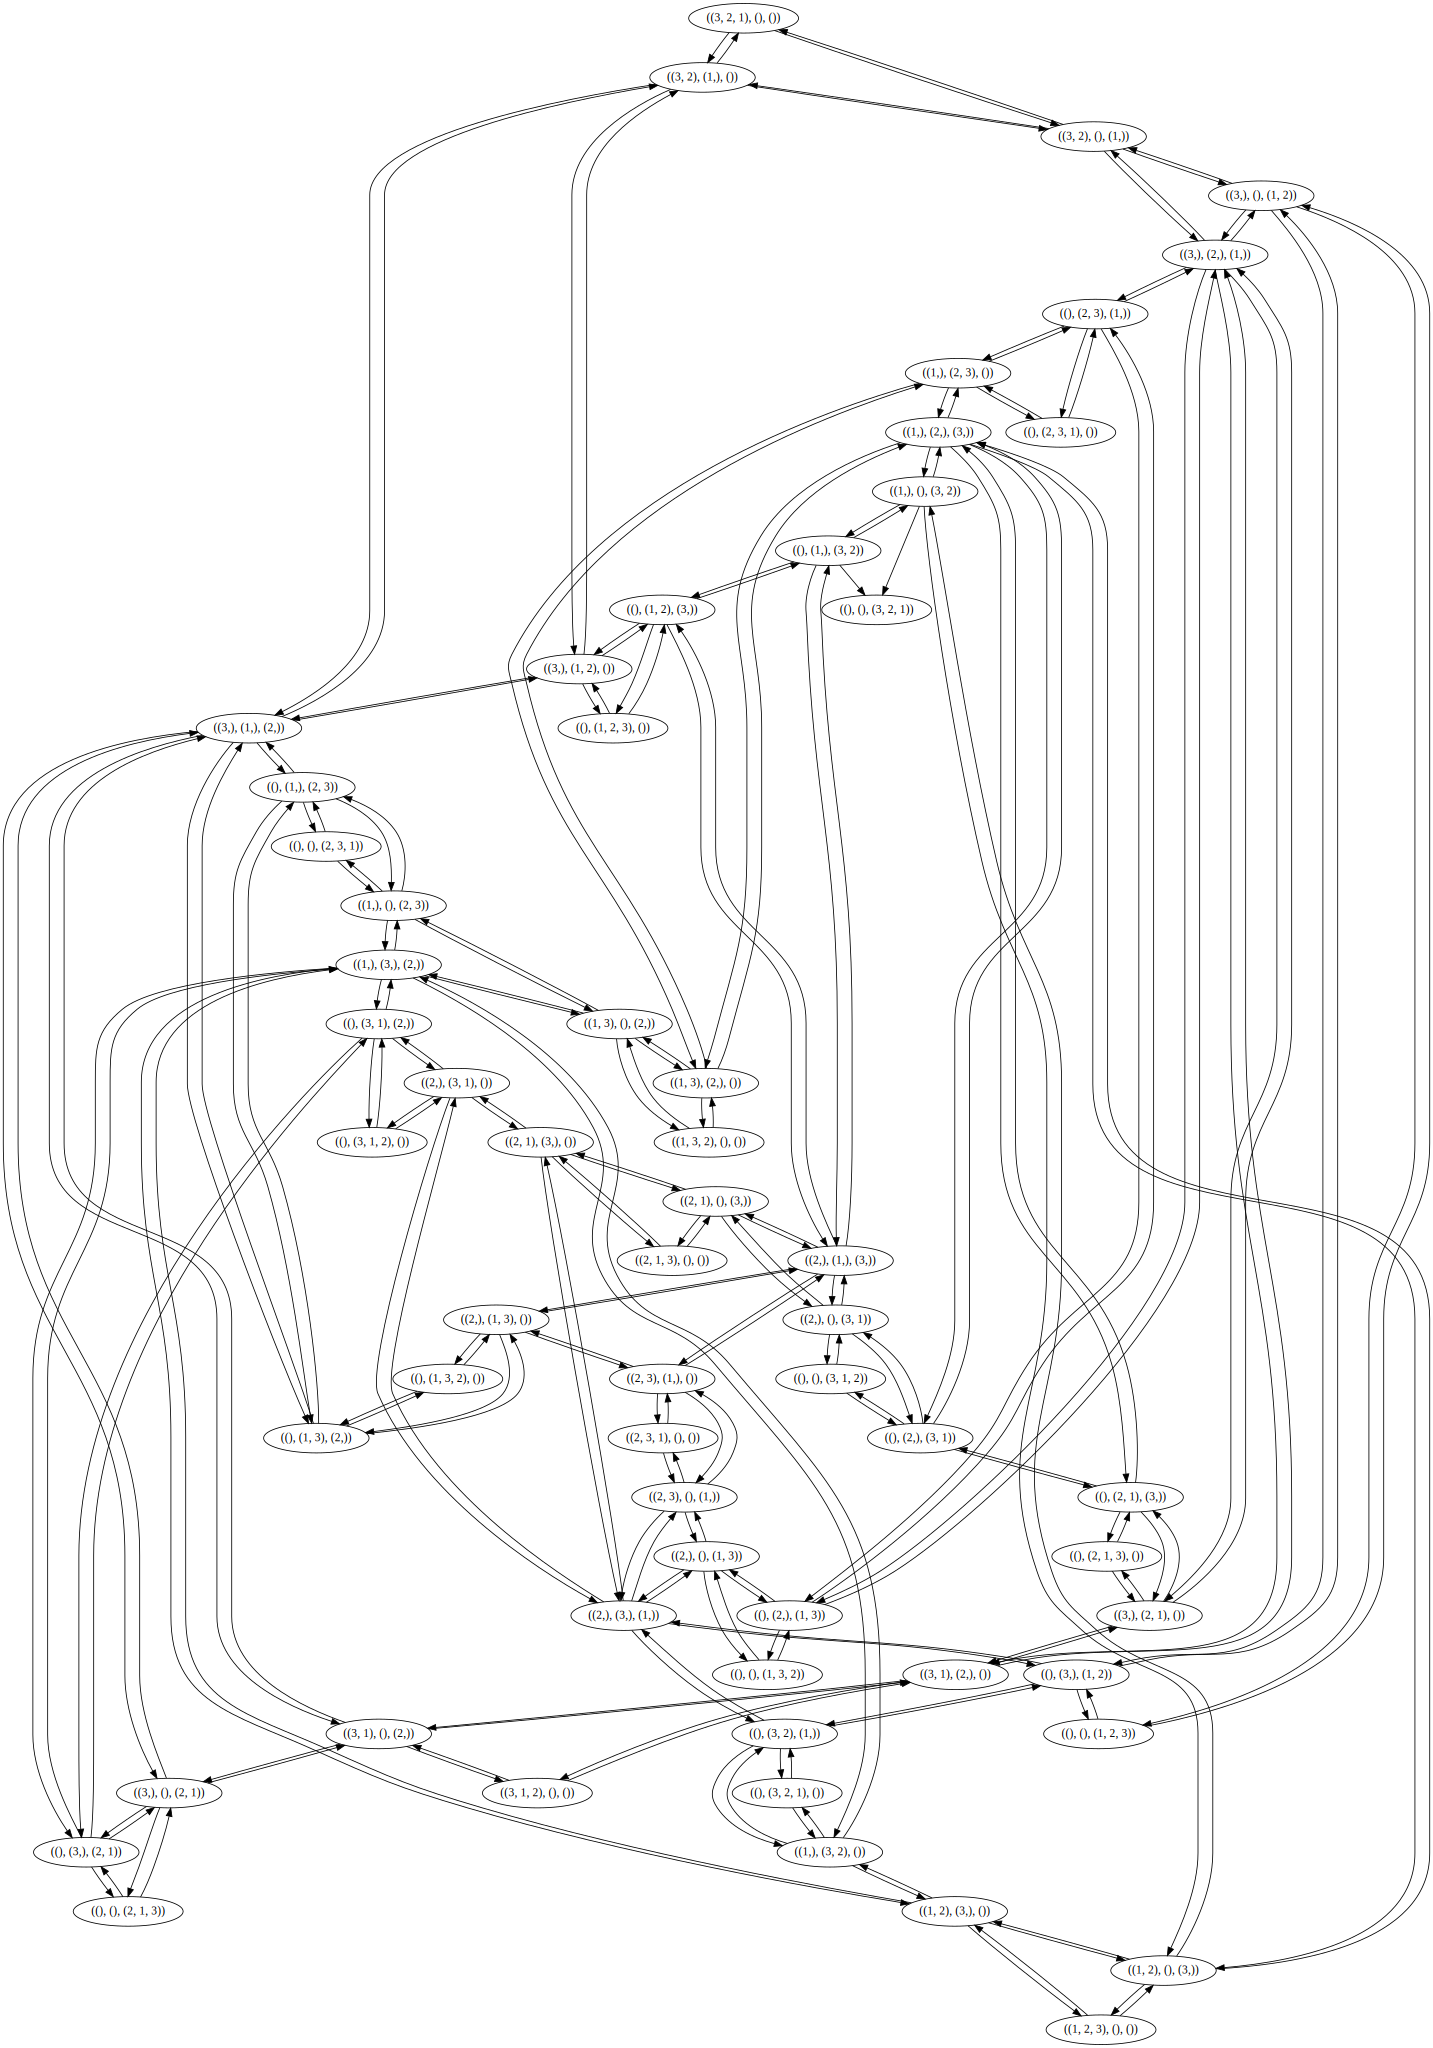

: 

In [ ]:
def mover_disco(estado, origen, destino):
    nuevo_estado = [list(torre) for torre in estado]
    if not nuevo_estado[origen]:
        return None  # No hay disco para mover
    disco = nuevo_estado[origen].pop()
    nuevo_estado[destino].append(disco)
    return tuple(tuple(torre) for torre in nuevo_estado)

# Generar el árbol de decisiones
def generar_hanoi_arbol(estado_inicial, estado_final):
    dot = Digraph(comment='Árbol de Torres de Hanoi')
    visitados = set()

    def dfs(estado, nombre_padre=None):
        estado_str = str(estado)
        if estado_str in visitados:
            return
        visitados.add(estado_str)
        
        dot.node(estado_str, estado_str)  # Crear nodo
        
        if estado == estado_final:
            return
        
        for origen in range(3):
            for destino in range(3):
                if origen != destino:
                    nuevo_estado = mover_disco(estado, origen, destino)
                    if nuevo_estado:
                        nuevo_estado_str = str(nuevo_estado)
                        dot.edge(estado_str, nuevo_estado_str)  # Crear conexión
                        dfs(nuevo_estado, estado_str)

    dfs(estado_inicial)
    return dot

# Estado inicial y final
estado_inicial = ((3,2,1), (), ())
estado_final = ((), (), (3,2,1))

# Generar y guardar el árbol
arbol = generar_hanoi_arbol(estado_inicial, estado_final)
arbol.render('hanoi_arbol', format='png', cleanup=True)
arbol
